## Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

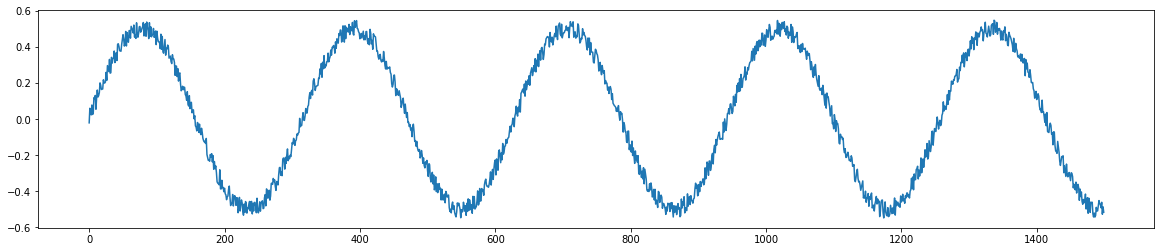

In [2]:
N = 1500
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Square Signal

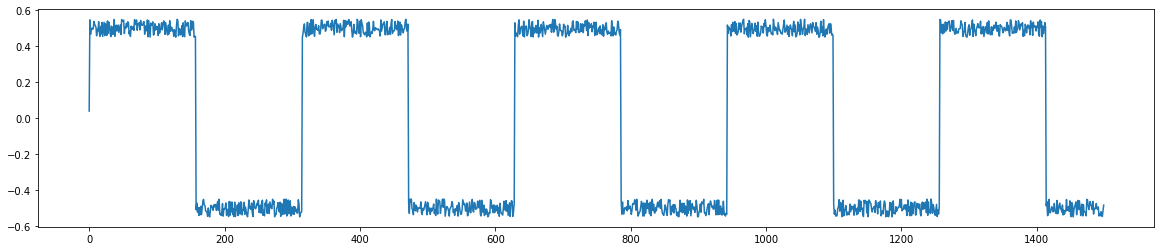

In [3]:
square_data = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(square_data)
plt.show()

## Triangle Signal

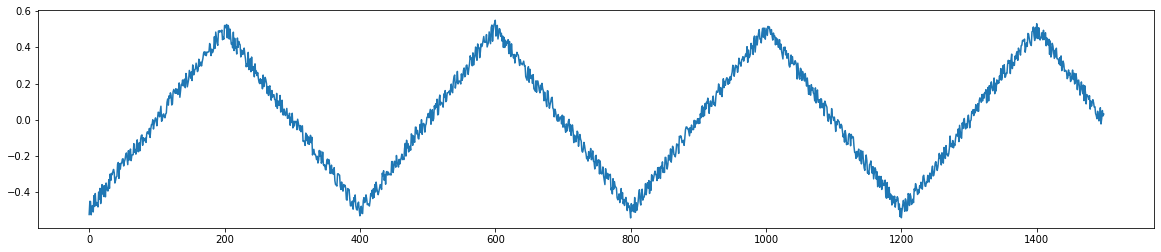

In [4]:
P = 200
A = 2 
triangle_data = ((A/P) * (P - np.abs(t % (2 * P) - P))-1) / 2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(triangle_data)
plt.show()

## Convert Signal To Dataset

In [5]:
def convertSignalToDataset(signal,step,label):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(label)
    
    return np.array(X), np.array(Y)

In [6]:
X_sin, Y_sin = convertSignalToDataset(sin_data,40,0)
X_square, Y_square = convertSignalToDataset(square_data,40,1)
X_triangle, Y_triangle = convertSignalToDataset(triangle_data,40,2) 

In [7]:
X = np.concatenate((X_sin,X_square,X_triangle),axis=0)
Y = np.concatenate((Y_sin,Y_square,Y_triangle),axis=0)
X = X[...,np.newaxis]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## Model
## GRU

In [9]:
model = Sequential()
model.add(GRU(units=64,input_shape=(X_train.shape[1:])))
model.add(Dense(128,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [10]:
model.compile(optimizer=Adam(),loss=sparse_categorical_crossentropy,metrics=["accuracy"])

In [11]:
history = model.fit(X_train,Y_train,
                   epochs=250,
                   batch_size = 32, 
                   validation_data=(X_test,Y_test))

Epoch 1/250
110/110 [==============================] - 4s 20ms/step - loss: 1.0020 - accuracy: 0.5023 - val_loss: 0.8448 - val_accuracy: 0.5628
Epoch 2/250
110/110 [==============================] - 2s 15ms/step - loss: 0.7667 - accuracy: 0.6033 - val_loss: 0.7168 - val_accuracy: 0.6438
Epoch 3/250
110/110 [==============================] - 2s 16ms/step - loss: 0.7077 - accuracy: 0.6136 - val_loss: 0.6454 - val_accuracy: 0.6370
Epoch 4/250
110/110 [==============================] - 2s 15ms/step - loss: 0.7503 - accuracy: 0.6036 - val_loss: 0.8333 - val_accuracy: 0.5993
Epoch 5/250
110/110 [==============================] - 2s 18ms/step - loss: 0.6960 - accuracy: 0.6353 - val_loss: 0.6157 - val_accuracy: 0.6815
Epoch 6/250
110/110 [==============================] - 2s 20ms/step - loss: 0.6314 - accuracy: 0.6564 - val_loss: 0.5440 - val_accuracy: 0.6712
Epoch 7/250
110/110 [==============================] - 2s 20ms/step - loss: 0.5879 - accuracy: 0.6610 - val_loss: 0.6294 - val_accuracy:

110/110 [==============================] - 3s 25ms/step - loss: 0.1313 - accuracy: 0.9432 - val_loss: 0.1242 - val_accuracy: 0.9612
Epoch 58/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1749 - accuracy: 0.9235 - val_loss: 0.1328 - val_accuracy: 0.9555
Epoch 59/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1296 - accuracy: 0.9458 - val_loss: 0.1016 - val_accuracy: 0.9612
Epoch 60/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1255 - accuracy: 0.9452 - val_loss: 0.3633 - val_accuracy: 0.8995
Epoch 61/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1441 - accuracy: 0.9355 - val_loss: 0.1015 - val_accuracy: 0.9475
Epoch 62/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1301 - accuracy: 0.9438 - val_loss: 0.0918 - val_accuracy: 0.9669
Epoch 63/250
110/110 [==============================] - 3s 25ms/step - loss: 0.1213 - accuracy: 0.9469 - val_loss: 0.1520 - val_accuracy: 0.930

110/110 [==============================] - 3s 24ms/step - loss: 0.1103 - accuracy: 0.9515 - val_loss: 0.0812 - val_accuracy: 0.9692
Epoch 114/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1034 - accuracy: 0.9526 - val_loss: 0.1044 - val_accuracy: 0.9486
Epoch 115/250
110/110 [==============================] - 3s 25ms/step - loss: 0.0844 - accuracy: 0.9609 - val_loss: 0.0703 - val_accuracy: 0.9669
Epoch 116/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1473 - accuracy: 0.9389 - val_loss: 0.1434 - val_accuracy: 0.9521
Epoch 117/250
110/110 [==============================] - 3s 24ms/step - loss: 0.1113 - accuracy: 0.9532 - val_loss: 0.0721 - val_accuracy: 0.9703
Epoch 118/250
110/110 [==============================] - 3s 24ms/step - loss: 0.0943 - accuracy: 0.9583 - val_loss: 0.0565 - val_accuracy: 0.9749
Epoch 119/250
110/110 [==============================] - 3s 25ms/step - loss: 0.0825 - accuracy: 0.9626 - val_loss: 0.1863 - val_accuracy:

110/110 [==============================] - 2s 20ms/step - loss: 0.0749 - accuracy: 0.9663 - val_loss: 0.0522 - val_accuracy: 0.9795
Epoch 170/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0738 - accuracy: 0.9692 - val_loss: 0.0597 - val_accuracy: 0.9772
Epoch 171/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0859 - accuracy: 0.9606 - val_loss: 0.0623 - val_accuracy: 0.9737
Epoch 172/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0693 - accuracy: 0.9680 - val_loss: 0.0506 - val_accuracy: 0.9817
Epoch 173/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0651 - accuracy: 0.9689 - val_loss: 0.0581 - val_accuracy: 0.9772
Epoch 174/250
110/110 [==============================] - 2s 19ms/step - loss: 0.0691 - accuracy: 0.9678 - val_loss: 0.0752 - val_accuracy: 0.9703
Epoch 175/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0692 - accuracy: 0.9697 - val_loss: 0.0620 - val_accuracy:

110/110 [==============================] - 2s 20ms/step - loss: 0.0554 - accuracy: 0.9740 - val_loss: 0.0623 - val_accuracy: 0.9726
Epoch 226/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0563 - accuracy: 0.9749 - val_loss: 0.0347 - val_accuracy: 0.9863
Epoch 227/250
110/110 [==============================] - 2s 19ms/step - loss: 0.0664 - accuracy: 0.9706 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 228/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0612 - accuracy: 0.9720 - val_loss: 0.0846 - val_accuracy: 0.9600
Epoch 229/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0586 - accuracy: 0.9729 - val_loss: 0.0521 - val_accuracy: 0.9829
Epoch 230/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0674 - accuracy: 0.9689 - val_loss: 0.0356 - val_accuracy: 0.9886
Epoch 231/250
110/110 [==============================] - 2s 20ms/step - loss: 0.0483 - accuracy: 0.9780 - val_loss: 0.0345 - val_accuracy:

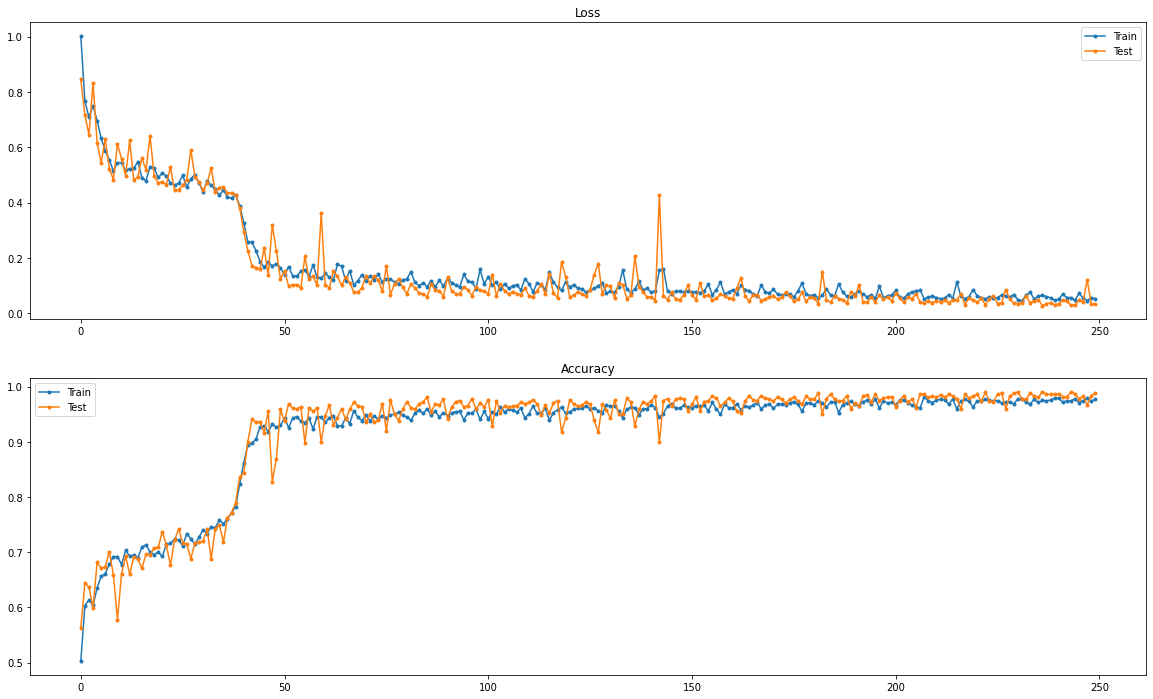

In [12]:
fig , (ax1,ax2) = plt.subplots(2,1,figsize=(20,12))
ax1.set_title("Loss")
ax2.set_title("Accuracy")
ax1.plot(history.history["loss"],label="Train",marker=".")
ax1.plot(history.history["val_loss"],label="Test",marker=".")
ax2.plot(history.history["accuracy"],label="Train",marker=".")
ax2.plot(history.history["val_accuracy"],label="Test",marker=".")
ax1.legend()
ax2.legend()
plt.show()

# Inference

## Sin Signal

In [13]:
N = 40
t = np.arange(0,N)
x = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

0


## Square Signal

In [14]:
N = 40
t = np.arange(0,N)
x = np.sign(np.sin(0.02*t))/2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

1


## Triangle Signal

In [15]:
N = 40
t = np.arange(0,N)
P = 200
A = 2 
x = ((A/P) * (P - np.abs(t % (2 * P) - P))-1) / 2 + np.random.uniform(-0.05,0.05,N)
x = x[np.newaxis,...,np.newaxis]
print(np.argmax(model.predict(x)))

2
